In [ ]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
import matplotlib.pyplot as plt
import cv2
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.models import load_model


In [ ]:
dataset_dir = '/content/drive/MyDrive/garbage_classification'

data_gen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_generator = data_gen.flow_from_directory(
    dataset_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='sparse',
    subset='training'
)

validation_generator = data_gen.flow_from_directory(
    dataset_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='sparse',
    subset='validation'
)


Found 8731 images belonging to 8 classes.
Found 2180 images belonging to 8 classes.


In [ ]:
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

for layer in base_model.layers:
    layer.trainable = False

model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(len(train_generator.class_indices), activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()


9406464/9406464 [==============================] - 0s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Func  (None, 5, 5, 1280)        2257984   
 tional)                                                         
                                                                 
 global_average_pooling2d_1  (None, 1280)              0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dense_2 (Dense)             (None, 512)               655872    
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_3 (Dense)             (None, 8)                 4104      
                                                           

In [ ]:
epochs = 20
callbacks = [
    ModelCheckpoint('/content/drive/MyDrive/best_model_pretrained.h5', monitor='val_accuracy', save_best_only=True, verbose=1),
    EarlyStopping(monitor='val_accuracy', patience=5, verbose=1)
]

history = model.fit(
    train_generator,
    epochs=epochs,
    validation_data=validation_generator,
    callbacks=callbacks,
    verbose=1
)


Epoch 1/20
273/273 [==============================] - ETA: 0s - loss: 0.3674 - accuracy: 0.8762
Epoch 1: val_accuracy improved from -inf to 0.87156, saving model to /content/drive/MyDrive/best_model_pretrained.h5
273/273 [==============================] - 265s 972ms/step - loss: 0.3674 - accuracy: 0.8762 - val_loss: 0.3436 - val_accuracy: 0.8716
Epoch 2/20
273/273 [==============================] - ETA: 0s - loss: 0.2327 - accuracy: 0.9221
Epoch 2: val_accuracy improved from 0.87156 to 0.87431, saving model to /content/drive/MyDrive/best_model_pretrained.h5
273/273 [==============================] - 215s 784ms/step - loss: 0.2327 - accuracy: 0.9221 - val_loss: 0.3556 - val_accuracy: 0.8743
Epoch 3/20
273/273 [==============================] - ETA: 0s - loss: 0.1851 - accuracy: 0.9360
Epoch 3: val_accuracy improved from 0.87431 to 0.88532, saving model to /content/drive/MyDrive/best_model_pretrained.h5
273/273 [==============================] - 256s 940ms/step - loss: 0.1851 - accuracy:

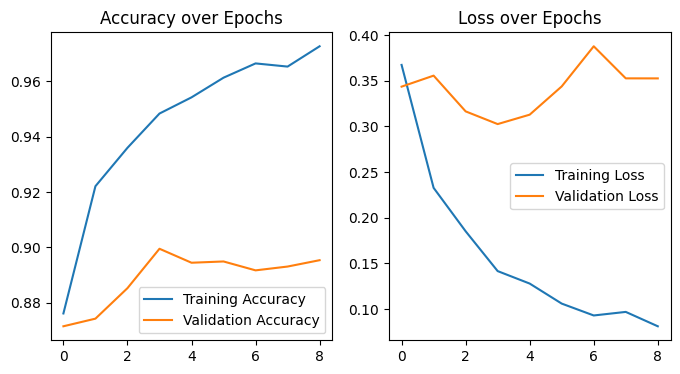

In [ ]:
def plot_history(history):
    plt.figure(figsize=(8, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Accuracy over Epochs')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Loss over Epochs')
    plt.legend()

    plt.show()

plot_history(history)


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model
from google.colab import files
import matplotlib.pyplot as plt


In [ ]:
# Load the trained model
model_path = '/content/drive/MyDrive/best_model_pretrained.h5'
model = load_model(model_path)

# Labels for prediction
labels = ['brown-glass', 'cardboard', 'clothes', 'green-glass', 'metal', 'paper', 'plastic', 'white-glass']


Saving images (3).jpeg to images (3).jpeg


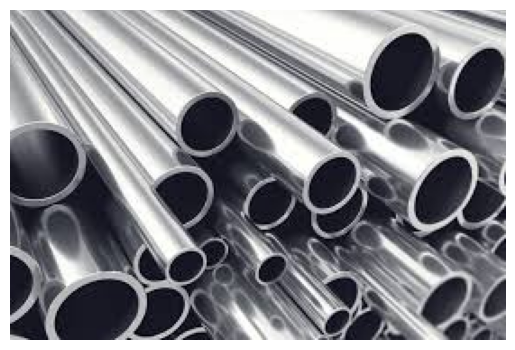

In [ ]:
# Upload an image file
uploaded = files.upload()

# Assuming the user uploads only one image, get the image name
image_name = next(iter(uploaded.keys()))

# Load the image for display
img_path = './' + image_name
img = image.load_img(img_path)  # Load without changing size

# Display the image in its original resolution
plt.imshow(img)
plt.axis('off')
plt.show()



In [ ]:
# Resize image for model prediction
img_resized = img.resize((150, 150))  # Resize the image to 150x150 for the model

# Preprocess the image
img_tensor = image.img_to_array(img_resized)  # Convert the image to a numpy array
img_tensor = np.expand_dims(img_tensor, axis=0)  # Add batch dimension
img_tensor /= 255.  # Normalize the image

# Predict the class
predictions = model.predict(img_tensor)
predicted_class = labels[np.argmax(predictions)]

print(f"The uploaded image is classified as: {predicted_class}")


1/1 [==============================] - 0s 43ms/step
The uploaded image is classified as: metal
